## 모델불러오기

In [4]:
from tensorflow.keras.models import load_model
model=load_model('./data/model/MNIST_CNN.hdf5')  
model.summary()  #모델을 불러오면 1-1에서 구성한 모델의 레이어와 웨이트,바이어스값을 모두 사용할수 있음.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

### 테스트데이터로 예측해봄
- 모델제작시 사용했던 사이즈와 흑백(28,28,1) 이미지로 변환
- 모델제작시 사용했던 /255를 진행해야함.
- 만약 흰색배경에 검정색 글씨였던 모델과 다른 흰색배경에 검정글씨라면 255- 로 배경을 뒤집어야함.
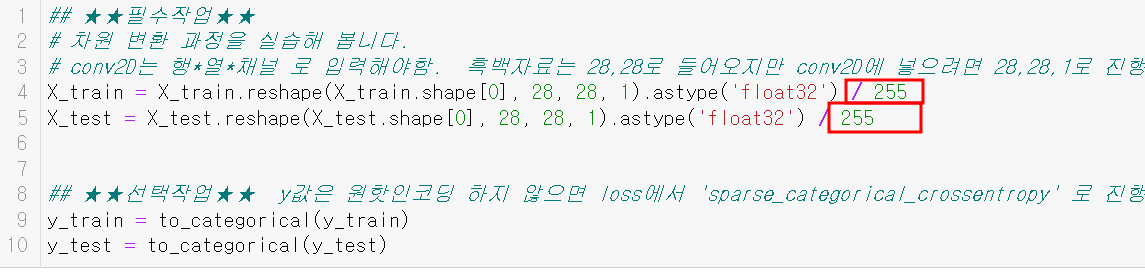

In [8]:
from PIL import Image
import numpy as np
img=Image.open('testData.png').convert('L') #흑백으로 읽음
img=img.resize((28,28))
img



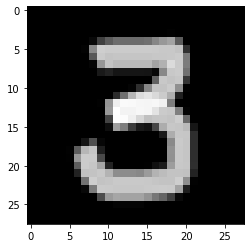

In [10]:
import matplotlib.pyplot as plt
imgArr=255-np.array(img)/255
plt.imshow(imgArr,cmap='gray')


- 아래코드의 predictNum에서 10개가 나오는 이유는 1-1에서 모델 제작할때의 output의 갯수가 10개여서임
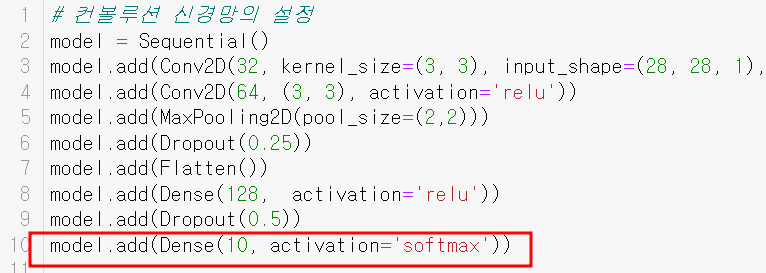

In [12]:
inputimage=imgArr.reshape(1,28,28,1)
predictNum=model.predict(inputimage)  # 1-1에서 모델제작할때 
predictNum


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3637742e-32, 0.0000000e+00]], dtype=float32)

In [13]:
num=np.argmax(predictNum)  #3번값이 제일큼
num

3

In [14]:
### 만약 0,1,2,..9 의 10 숫자가 y값이 아니라  별도의 클래스 이름이 있다면
class_names=['A-1','A-2','A-3','A-4','A-5','A-6','A-7','A-8','A-9','A-10']
class_names[num]

'A-4'